# TASK 3 - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore

As a business manager, try to find out the weak areas where you can work to make more profit.



## Intern Name - Neha Jha

In [1]:
#Important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
data = pd.read_csv("SampleSuperstore.csv.zip")
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape


(9994, 13)

In [5]:
data.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
##checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#Checking if any columns having unique value ie only 1 value
unique = data.nunique()
unique = unique[unique.values ==1]
unique

Country    1
dtype: int64

In [8]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
data.duplicated().sum()


17

In [11]:
data.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
data['Postal Code'] = data['Postal Code'].astype('object')


In [13]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

## Exploratory Data Analysis

<Axes: >

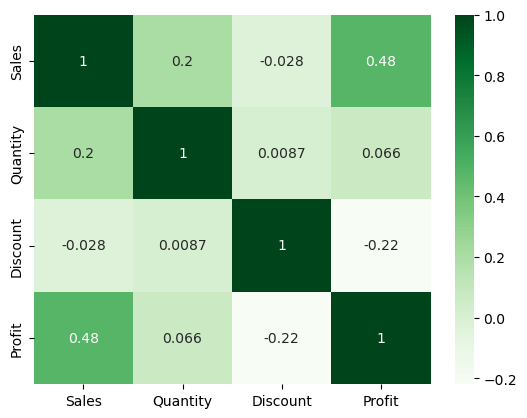

In [14]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='Greens')

In [15]:
#dropping postal code columns
data = data.drop(['Postal Code'],axis = 1)

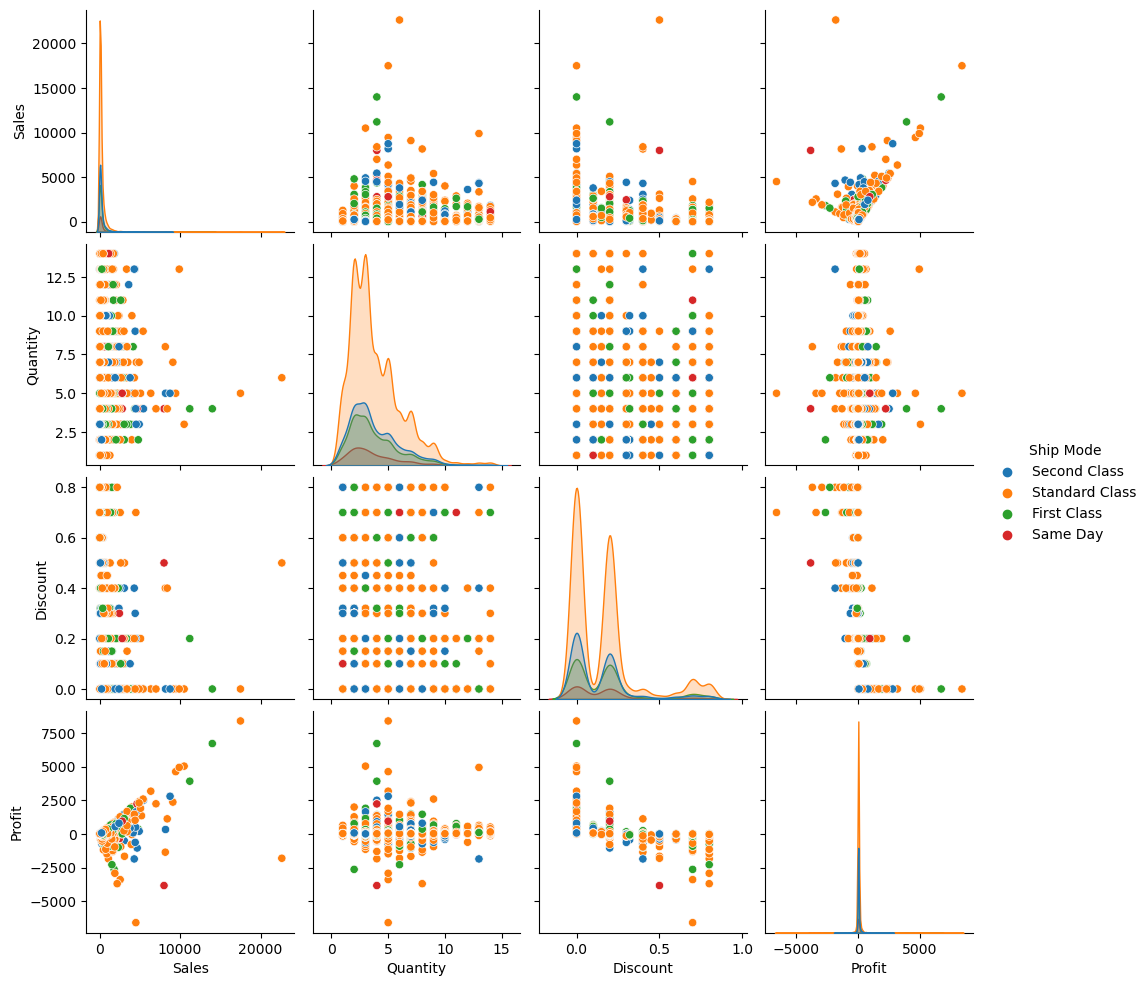

In [16]:
sns.pairplot(data, hue = 'Ship Mode')

In [17]:
data['Ship Mode'].value_counts()


Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

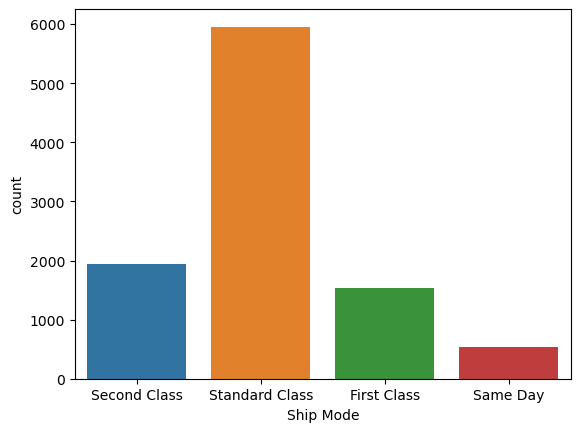

In [18]:
sns.countplot(x=data['Ship Mode'])


In [19]:
#valuecounts for segment
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

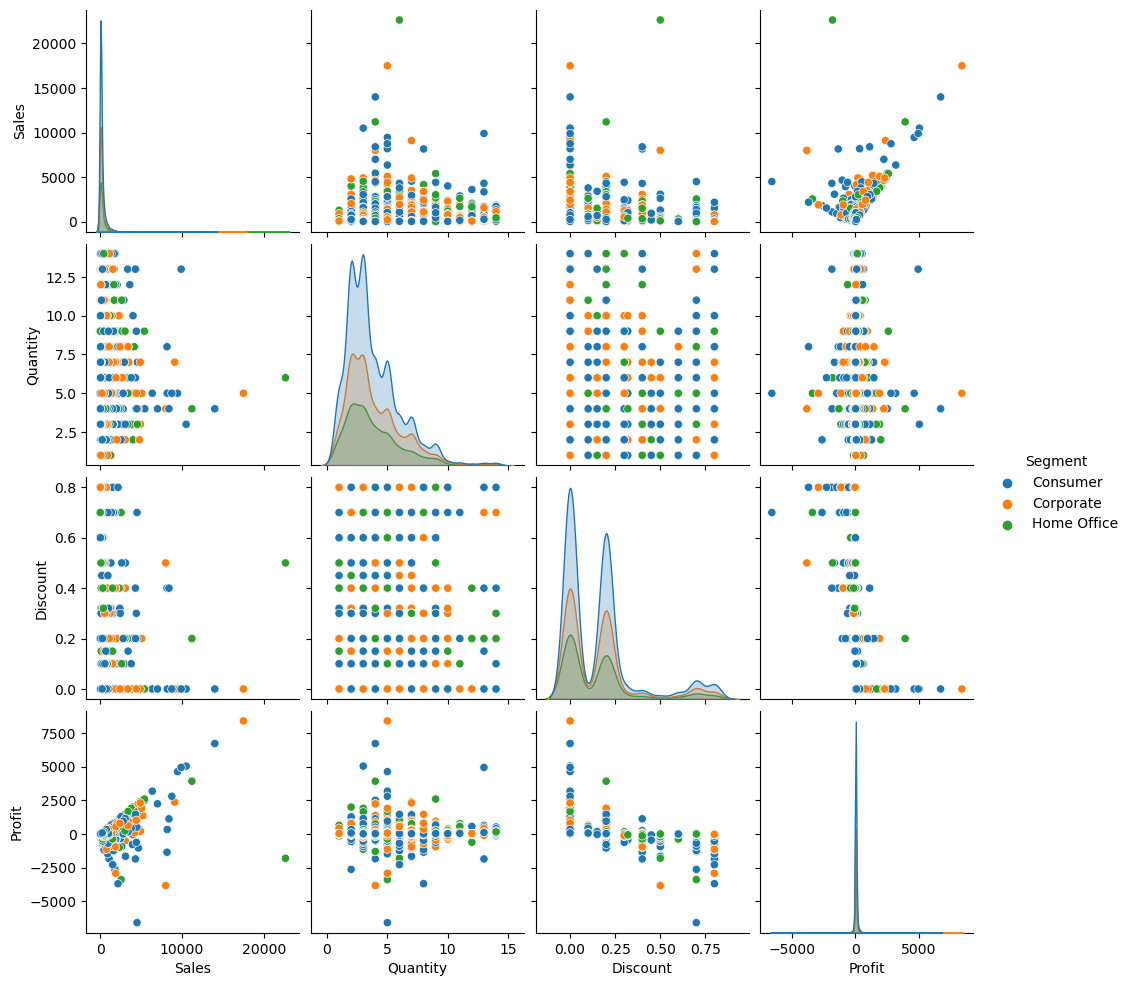

In [20]:
#plotting pair plot
sns.pairplot(data,hue = 'Segment')

<Axes: xlabel='Segment', ylabel='count'>

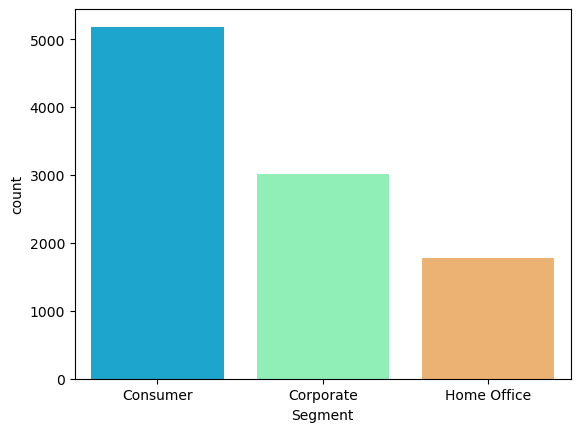

In [21]:
sns.countplot(x = 'Segment',data = data, palette = 'rainbow')

In [22]:
data['Category'].value_counts()


Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

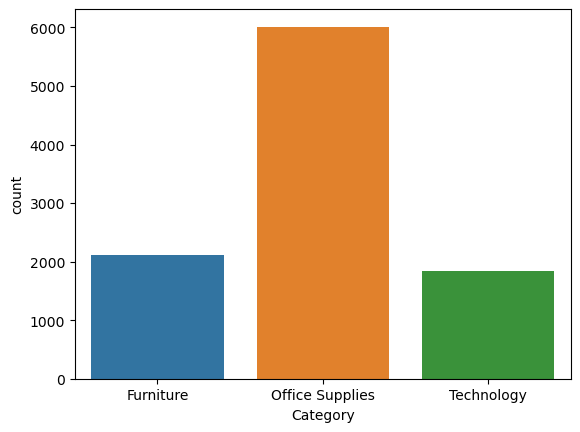

In [23]:
sns.countplot(x='Category',data=data,palette='tab10')


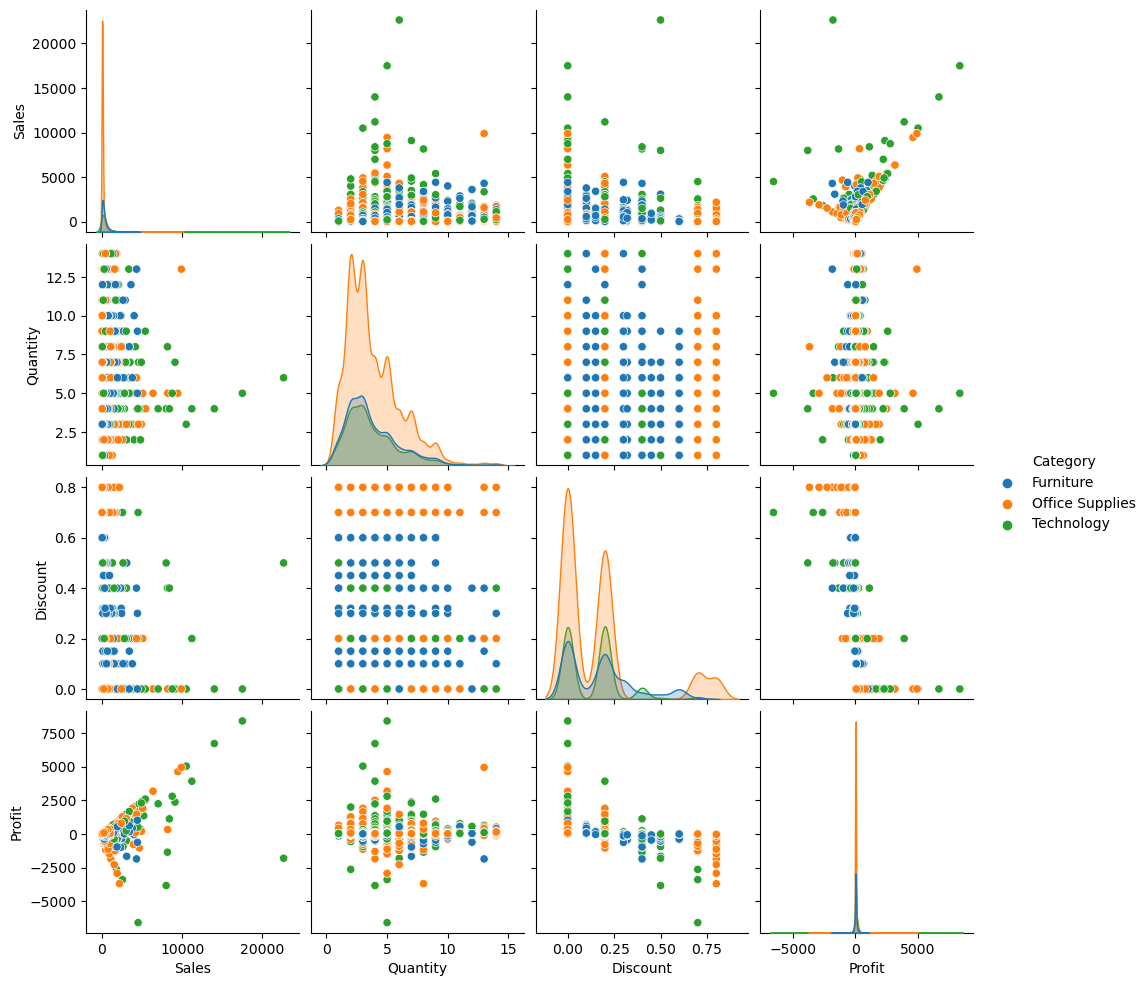

In [24]:
sns.pairplot(data,hue='Category')


In [25]:
data['Sub-Category'].value_counts()


Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

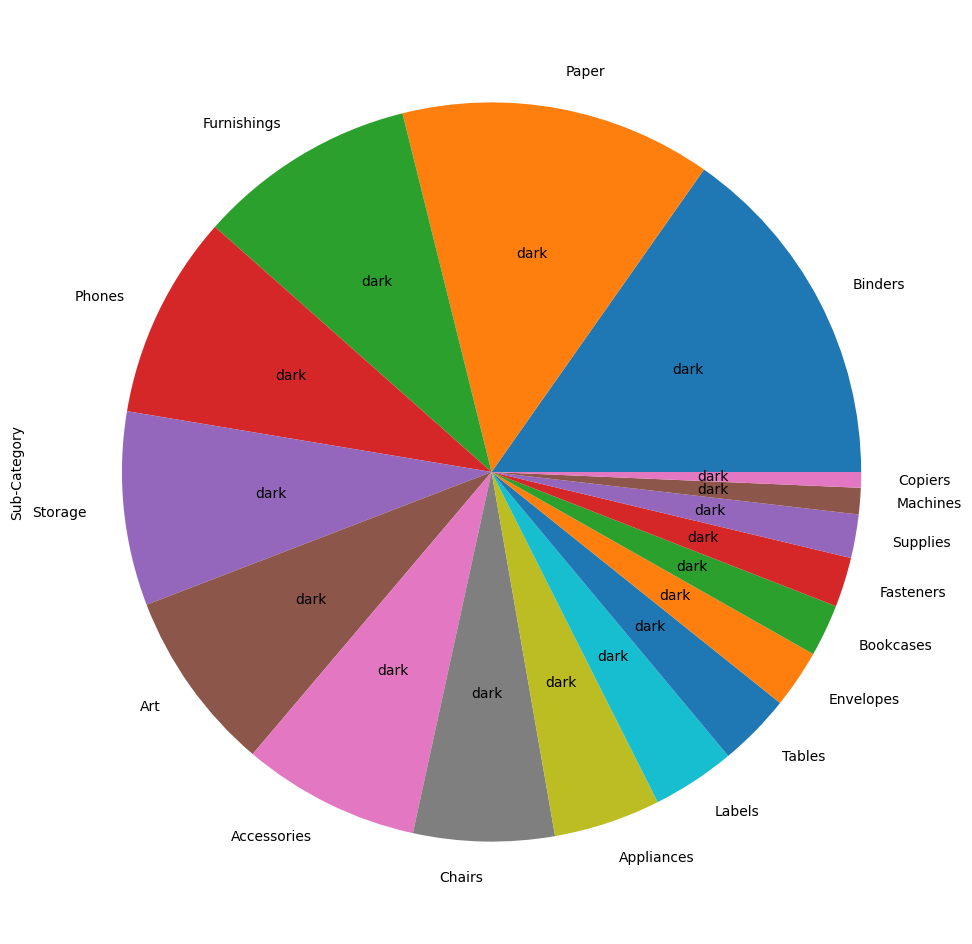

In [26]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

### Insight 1:Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers


In [27]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

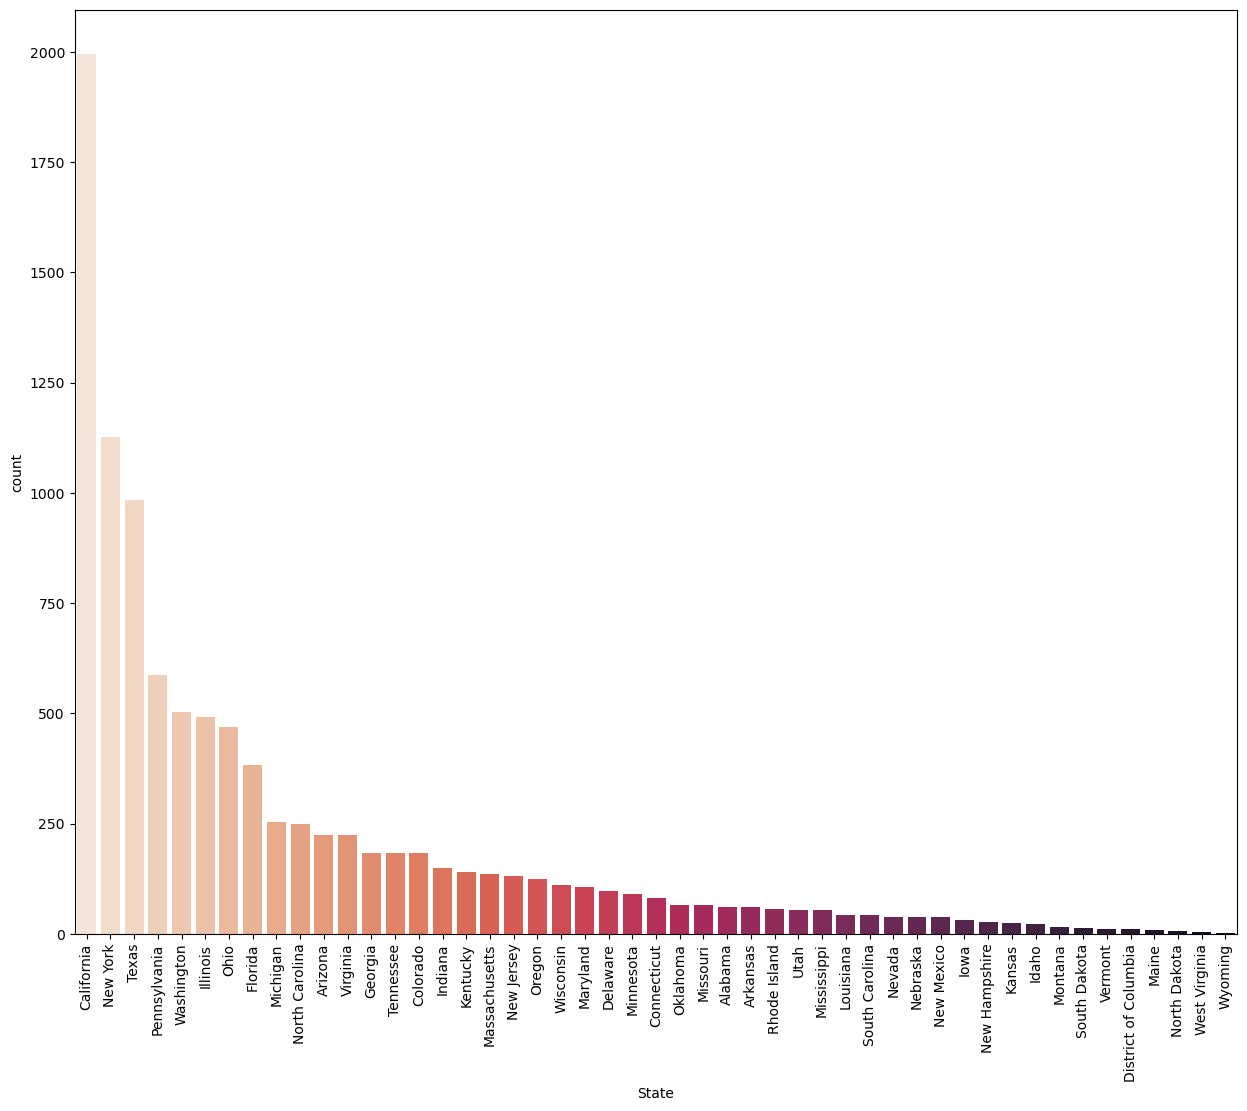

In [28]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Insight 2: Highest number of buyers are from calofornia and newyork


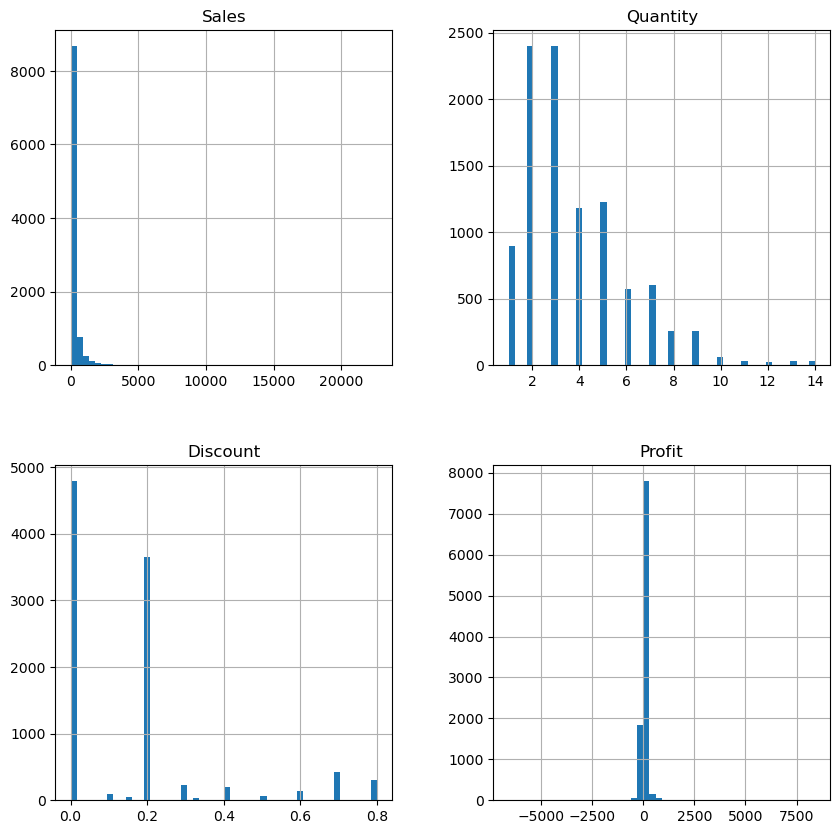

In [29]:
data.hist(figsize=(10,10),bins=50)
plt.show()

### Insight:

### 1. Most customers tends to buy quantity of 2 and 3


### 2. Discount give maximum is 0 to 20 percent


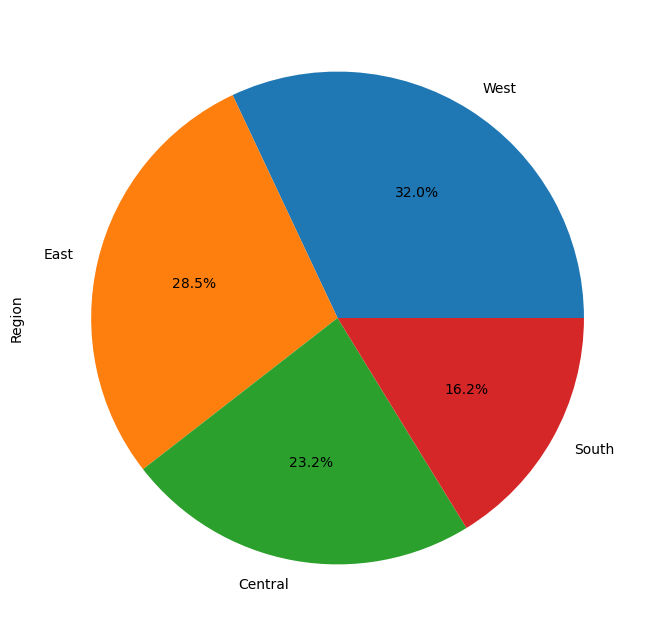

In [30]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Profit vs Discount

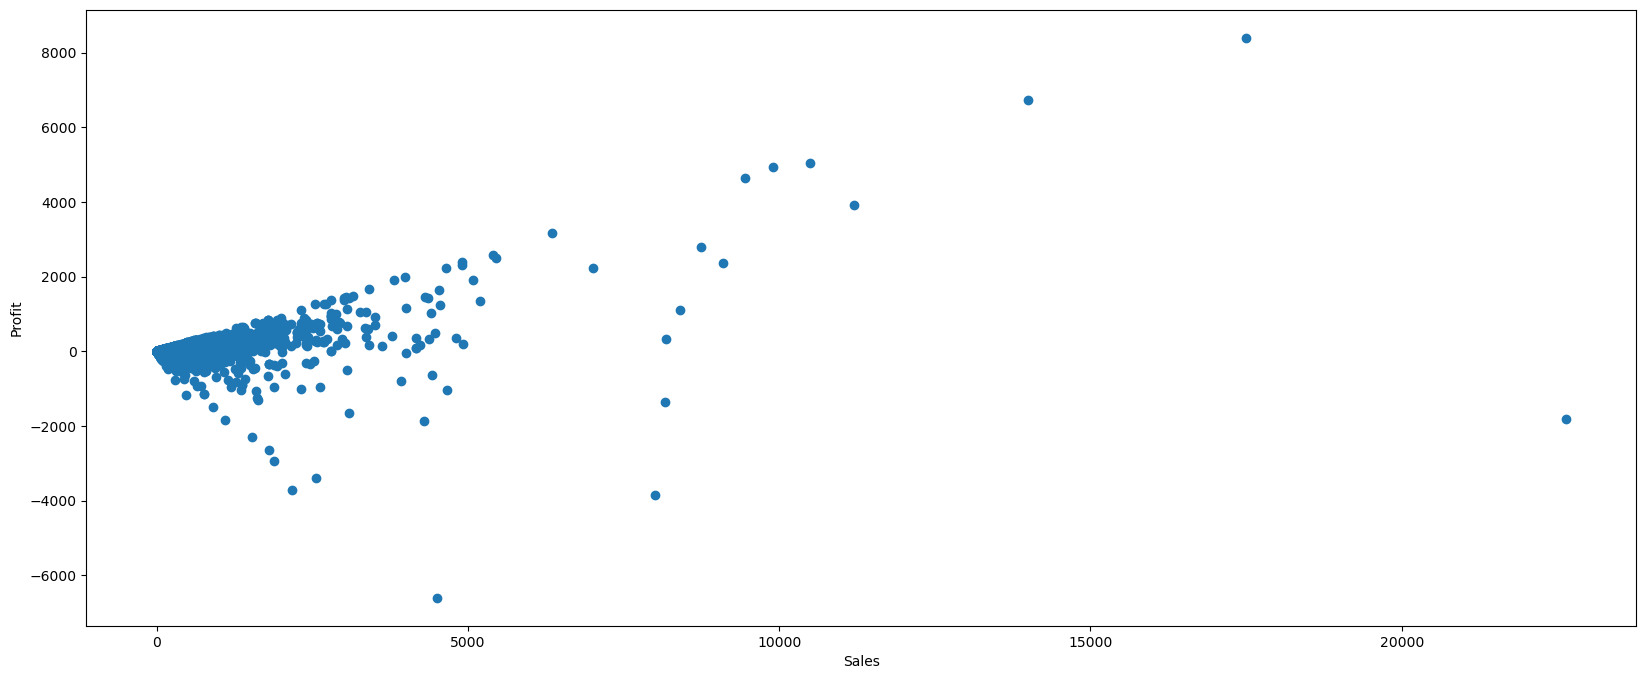

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

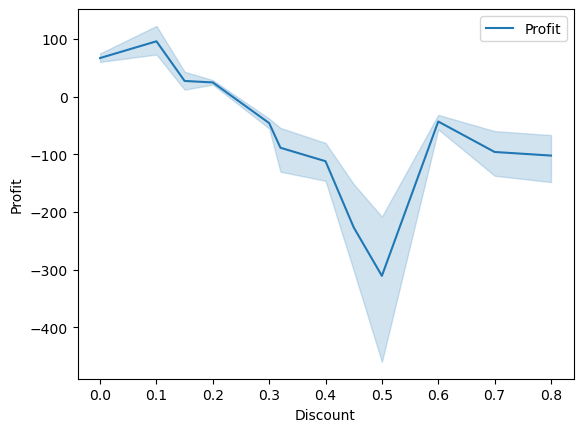

In [32]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

### Insight: No correlation between profit and discount


### Profit Vs Quantity


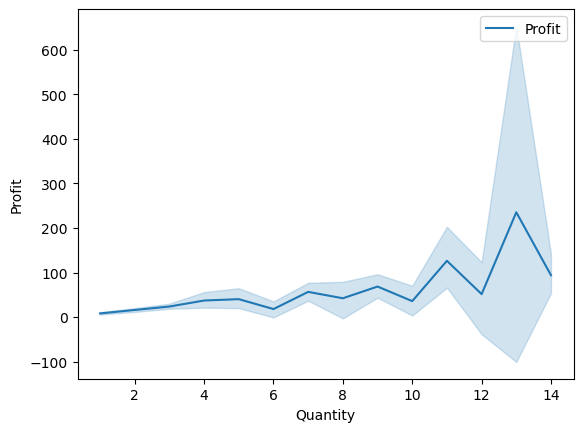

In [33]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

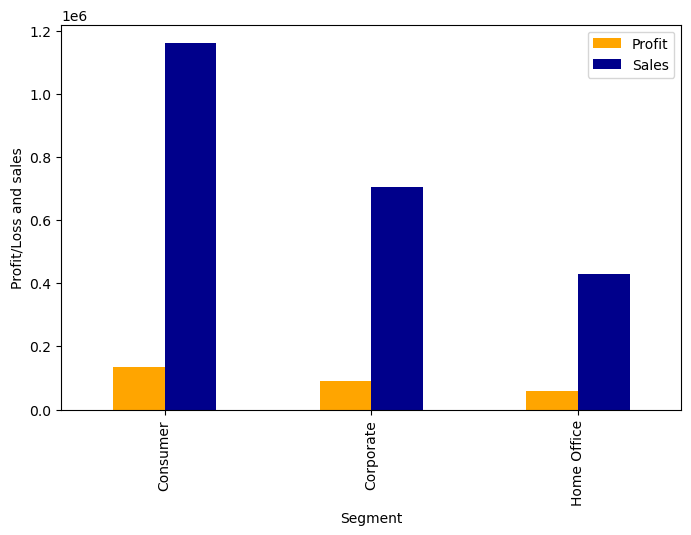

In [34]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['orange','darkblue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Insight: Profit and sales are maximum in consumer segment and minimum in Home Office segment


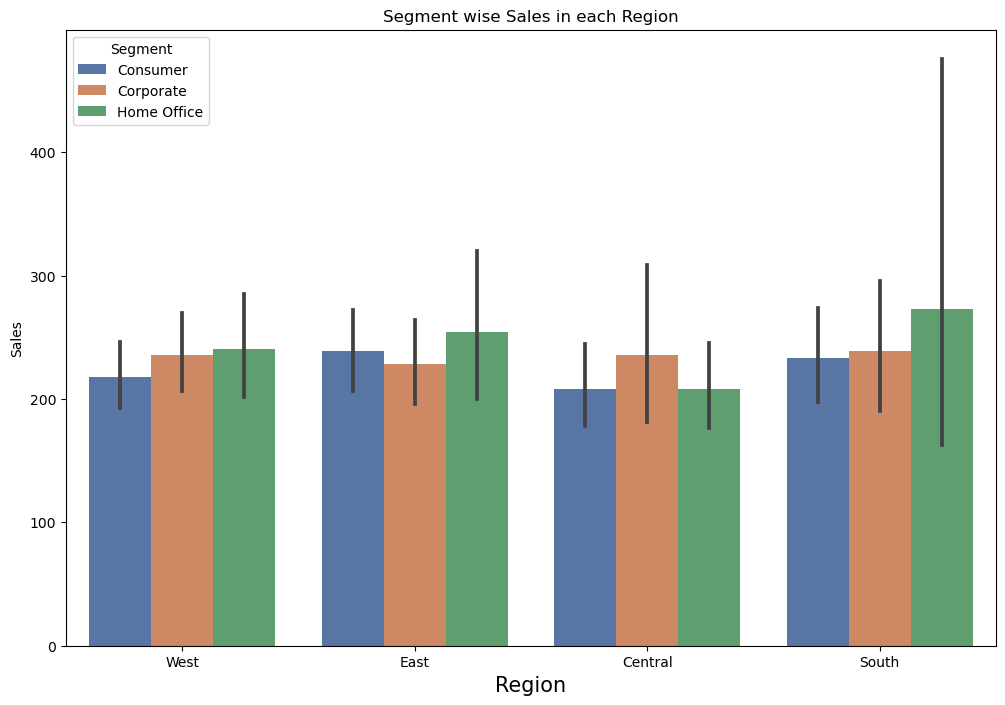

In [35]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='deep')
plt.xlabel('Region',fontsize=15)
plt.show()

### Insight: Segment wise sales are almost same in every region


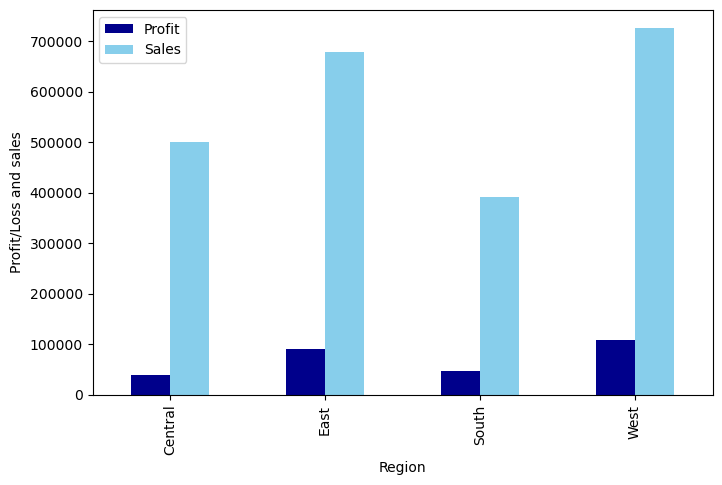

In [36]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['darkblue','skyblue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Insight: Profit and Sales are maximum in west region and minimum in south region


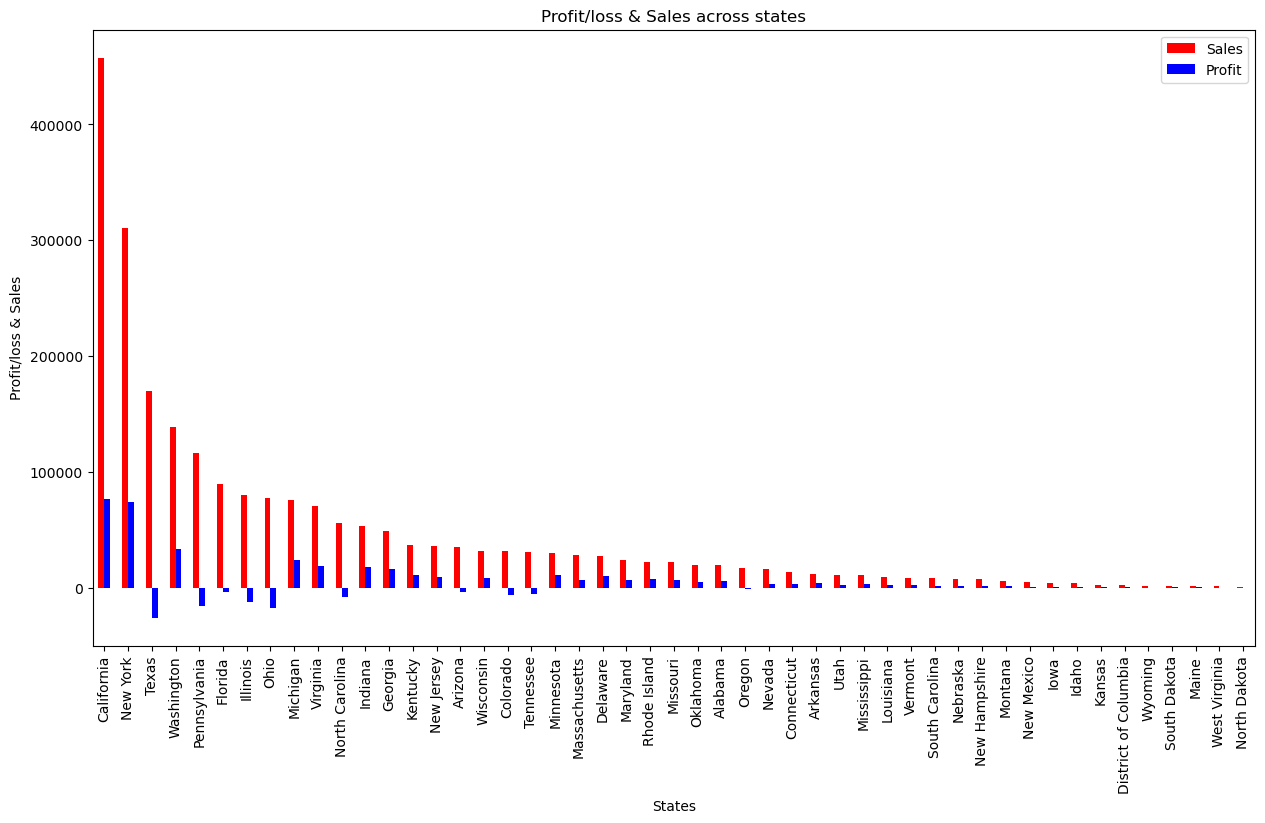

In [37]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','blue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Insight:

1.High profit is for california, new york

2.Loss is for texas, pennsylvania, Ohio

In [38]:
t_states = data['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

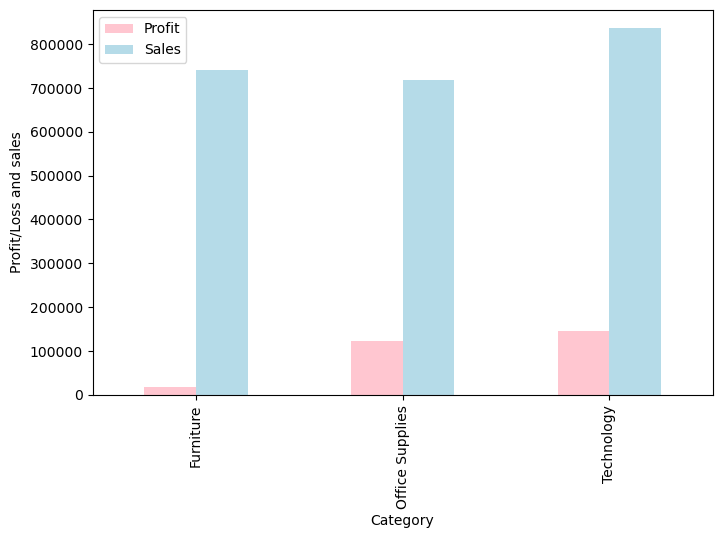

In [39]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['pink','lightblue'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

## Insight: As a business manager, try to find out the weak areas where you can work to make more profit?

1.Technology and Office Supplies have high profit.

2.Furniture have less profit

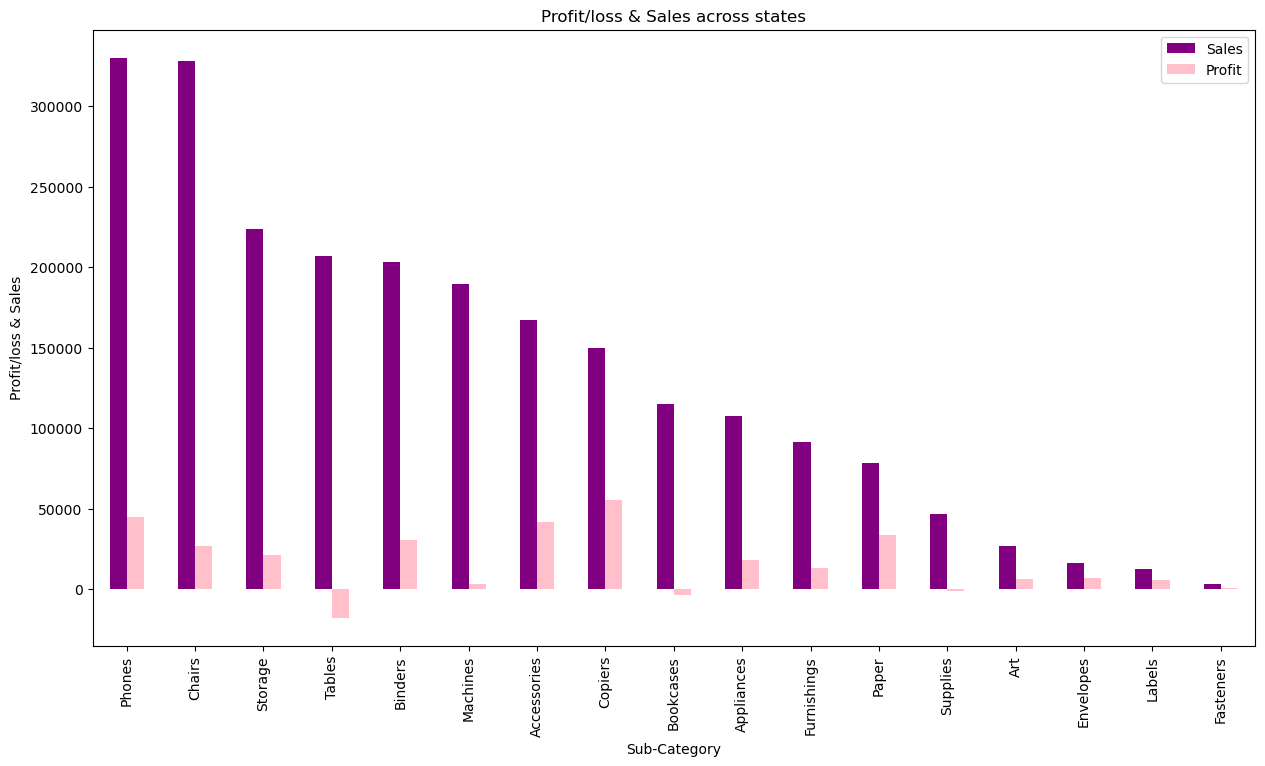

In [40]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['purple','pink'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Insight:

1.Phones sub-category have high sales.

2.chairs have high sales but less profit compared to phones

3.Tables and Bookmarks sub-categories facing huge loss